<img src="https://pyrolite.readthedocs.io/en/develop/_static/icon.png" width="35%" style="float: right; margin: 0px 15px 15px 0px;"/>

# pyrolite: Python for Geochemistry

**Intro** [Start](0.0_StartHere.ipynb) • [Intro](1.1_Introduction.ipynb)
<br> **pyrolite** <mark>[Geochem](2.1_pyroliteGeochem.ipynb)</mark> • [Visualisation](2.2_pyroliteVis.ipynb) • [alphaMELTS](2.3_pyroliteMELTS.ipynb) • [lambdas](2.4_lambdas.ipynb) <br>  **Comparative Geochem**  [Databases, Data Mining and Deriving Context](3.1_ComparativeGeochemData.ipynb)<br>  **Machine Learning** [Intro](4.0_MachineLearning.ipynb) • [Features](4.1_Features.ipynb)• [High-D Vis](4.3_HighDVis.ipynb) • [Classification](4.4_Classification.ipynb) • [Regression & Prediction](4.5_Regression.ipynb) • [Clustering](4.6_Clustering.ipynb) <br>  **GitHub** [geochem4nickel](https://github.com/morganjwilliams/geochem4nickel) • [pyrolite](https://github.com/morganjwilliams/pyrolite)

#### <i class="fa fa-twitter" aria-hidden="true"><a href="https://twitter.com/metasomite" style="font-family:Courier New,Courier,Lucida Sans Typewriter,Lucida Typewriter,monospace;"> @metasomite</a></i>

## pyrolite?

pyrolite is a python package developed for geochemical data analysis and visualisation. The package includes functions to work with compositional data, to transform geochemical variables (e.g. elements to oxides), functions for common plotting tasks (e.g. spiderplots, ternary diagrams, bivariate and ternary density diagrams), and numerous auxiliary utilities.

### Documentation

<img src="../img/docs_examples.png" width="50%" style="float: right; margin: 0px 15px 15px 0px;"/>

* [pyrolite.rtfd.io](pyrolite.rtfd.io):
    * Installation
    * Examples
    * API
    * Changelog
    * Contributing
    * Citation

!pip install pyrolite

## Dealing with Geochemistry

* Ratios
* Compositional data
* Scales (wt%, ppm, ppb)
* Normalisation
* Transformation (e.g. Fe2O3 to FeO)


In [1]:
import pyrolite.geochem
from scripts.dataloader import load_belts, load_koms

In [2]:
df = load_belts()
df.head(2)

,Greenstone belt,Locality,Location1,FakeName,Location2,Sample,SiO2,TiO2,Al2O3,FeO,...,Nd,Sm,Eu,Gd,Dy,Tb,Ho,Er,Tm,Yb
0,Albany-Fraser,GSWA-Albany-Fraser unassigned,Albany-Fraser,Norwegian Wood,NaN,GSWA-180722,49.99,1.22,16.15,9.28,...,12.33,2.68,1.18,3.23,3.40,0.59,0.79,2.17,NaN,2.13
1,Albany-Fraser,GSWA-Albany-Fraser unassigned,Albany-Fraser,Norwegian Wood,NaN,GSWA-182456,45.74,1.11,14.18,16.63,...,13.74,3.71,1.24,4.14,4.27,0.66,0.97,2.53,NaN,2.45


In [3]:
df.head(2).pyrochem.oxides

,SiO2,TiO2,Al2O3,FeO,MgO
0,49.99,1.22,16.15,9.28,8.18
1,45.74,1.11,14.18,16.63,7.10


In [4]:
df.head(2).pyrochem.elements

,Ni,Cu,Cr,V,Zr,Pt,Pd,Th,Nb,La,...,Nd,Sm,Eu,Gd,Dy,Tb,Ho,Er,Tm,Yb
0,126.14,97.19,310,271.45,66.06,NaN,NaN,1.65,2.99,8.65,...,12.33,2.68,1.18,3.23,3.40,0.59,0.79,2.17,NaN,2.13
1,80.66,70.46,378,244.10,85.44,NaN,NaN,0.83,3.33,9.86,...,13.74,3.71,1.24,4.14,4.27,0.66,0.97,2.53,NaN,2.45


In [5]:
df.head(2).pyrochem.REE

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb
0,8.65,21.88,2.98,12.33,2.68,1.18,3.23,0.59,3.40,0.79,2.17,NaN,2.13
1,9.86,22.34,2.88,13.74,3.71,1.24,4.14,0.66,4.27,0.97,2.53,NaN,2.45


In [6]:
lets_get = df.pyrochem.list_oxides + df.pyrochem.list_REE + [{"FeO": 0.9, "Fe2O3": 0.1}]
df.head(2).pyrochem.convert_chemistry(to=lets_get)

,Greenstone belt,Locality,Location1,FakeName,Location2,Sample,Mg#,Correction factor,S*,SiO2,...,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,FeO,Fe2O3
0,Albany-Fraser,GSWA-Albany-Fraser unassigned,Albany-Fraser,Norwegian Wood,NaN,GSWA-180722,58.15,1.032119,0.0,49.99,...,1.18,3.23,0.59,3.40,0.79,2.17,NaN,2.13,8.352,1.031331
1,Albany-Fraser,GSWA-Albany-Fraser unassigned,Albany-Fraser,Norwegian Wood,NaN,GSWA-182456,40.40,0.924631,0.0,45.74,...,1.24,4.14,0.66,4.27,0.97,2.53,NaN,2.45,14.967,1.848171


In [7]:
cols = ["Ni", "NiO", "La", "La2O3"]
df.head(2).pyrochem.convert_chemistry(to=cols)[cols]  # these are in ppm!

,Ni,NiO,La,La2O3
0,126.14,160.524860,8.65,10.144485
1,80.66,102.647338,9.86,11.563540


In [8]:
df[["Ni"]].head(2).pyrochem.convert_chemistry(to=["NiO"]).pyrochem.scale("ppm", "wt%")

,NiO
0,0.016052
1,0.010265


In [9]:
df.head(2).pyrochem.REE.pyrochem.normalize_to("Chondrite_PON")

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb
0,35.832643,35.324508,31.735889,26.029132,17.447917,20.057794,15.611406,15.538583,13.291634,13.997165,13.111782,NaN,12.625963
1,40.845070,36.067162,30.670927,29.005700,24.153646,21.077681,20.009667,17.382144,16.692729,17.186393,15.287009,NaN,14.522822


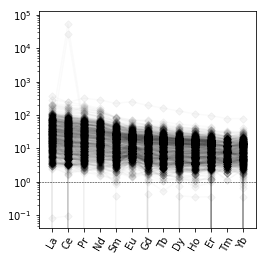

In [10]:
%matplotlib inline
import pyrolite.plot

ax = df.pyrochem.REE.pyrochem.normalize_to("Chondrite_PON").pyroplot.spider(
    unity_line=True, color="k", alpha=0.02
)
ax.set_yscale("log")

In [11]:
df.head(2)[["MgO", "FeO"]].pyrochem.to_molecular(renorm=False)

,MgO,FeO
0,0.202956,0.129168
1,0.176159,0.231472


In [12]:
df.head(2)[["MgO", "FeO"]].pyrochem.add_MgNo()

,MgO,FeO,Mg#
0,8.18,9.28,0.611084
1,7.10,16.63,0.432153


In [13]:
df.head(2)[["Mg#"]]

,Mg#
0,58.15
1,40.40


In [14]:
df.head(2).pyrochem.add_ratio("Ni/La")

,Greenstone belt,Locality,Location1,FakeName,Location2,Sample,SiO2,TiO2,Al2O3,FeO,...,Sm,Eu,Gd,Dy,Tb,Ho,Er,Tm,Yb,Ni/La
0,Albany-Fraser,GSWA-Albany-Fraser unassigned,Albany-Fraser,Norwegian Wood,NaN,GSWA-180722,49.99,1.22,16.15,9.28,...,2.68,1.18,3.23,3.40,0.59,0.79,2.17,NaN,2.13,14.582659
1,Albany-Fraser,GSWA-Albany-Fraser unassigned,Albany-Fraser,Norwegian Wood,NaN,GSWA-182456,45.74,1.11,14.18,16.63,...,3.71,1.24,4.14,4.27,0.66,0.97,2.53,NaN,2.45,8.180527


In [15]:
df.head(2).pyrochem.lambda_lnREE()

,λ0,λ1,λ2,λ3
0,2.952842,6.749698,29.489857,-283.968776
1,3.107822,5.885464,13.007349,-96.994295


Next: [Visualisation](2.2_pyroliteVis.ipynb)